In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import metrics

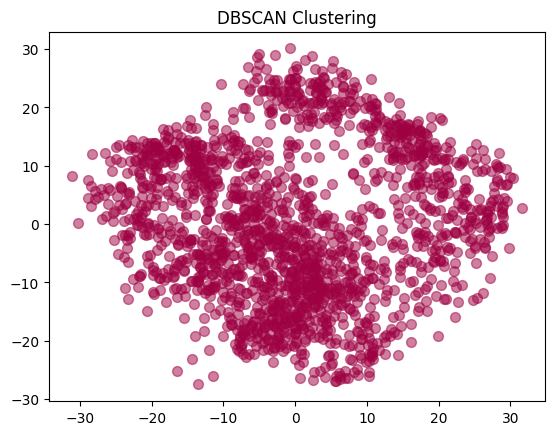

In [3]:
# Carregar o conjunto de dados MNIST
digits = load_digits()
data = digits.data
labels_true = digits.target

# Reduzir a dimensionalidade para facilitar a visualização
data_pca = PCA(n_components=2).fit_transform(data)

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=30, min_samples=5)
labels_pred = dbscan.fit_predict(data_pca)

# Visualizar os clusters
unique_labels = set(labels_pred)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels_pred == k)

    xy = data_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

In [4]:
# Propagar os rótulos dos clusters para os exemplos
# Vamos usar a moda (valor mais comum) dos rótulos no cluster
unique_labels = set(labels_pred)
for cluster_label in unique_labels:
    if cluster_label != -1:
        cluster_mask = (labels_pred == cluster_label)
        cluster_examples = labels_true[cluster_mask]
        most_common_label = np.bincount(cluster_examples).argmax()
        labels_pred[cluster_mask] = most_common_label

# Avaliar a qualidade da clusterização
print("Número de clusters estimados:", len(set(labels_pred)) - (1 if -1 in labels_pred else 0))
print("Ajusted Rand Index:", metrics.adjusted_rand_score(labels_true, labels_pred))

Número de clusters estimados: 1
Ajusted Rand Index: 0.0
